In [6]:
import ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import scipy
import neurokit2 as nk
import random
import pyhrv

# PPG preprocessing

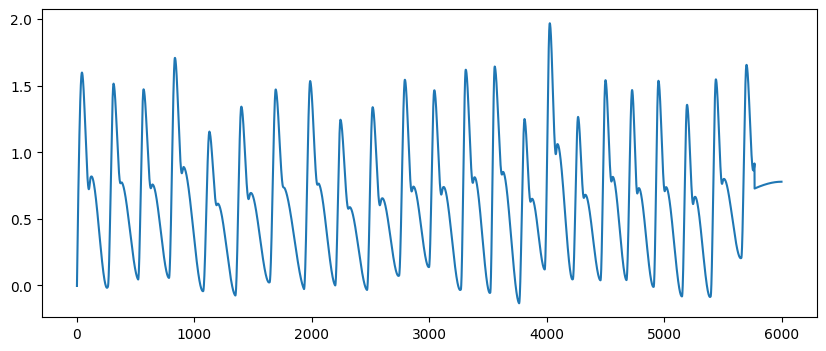

In [78]:
ppg = nk.ppg_simulate(duration=20, sampling_rate= 300, heart_rate=70)
data = pd.DataFrame({"PPG": ppg,})
plt.figure(figsize=(10,4))
plt.plot(data)

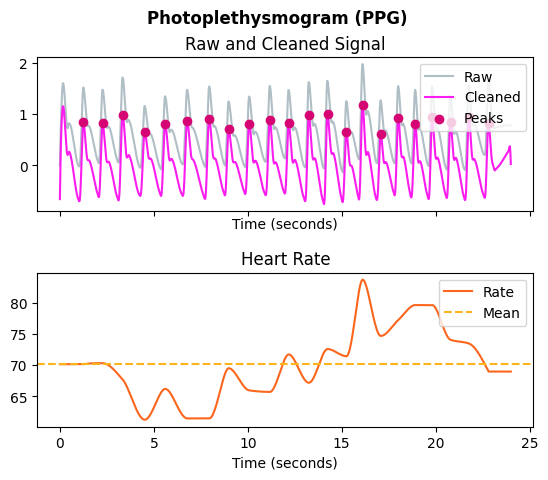

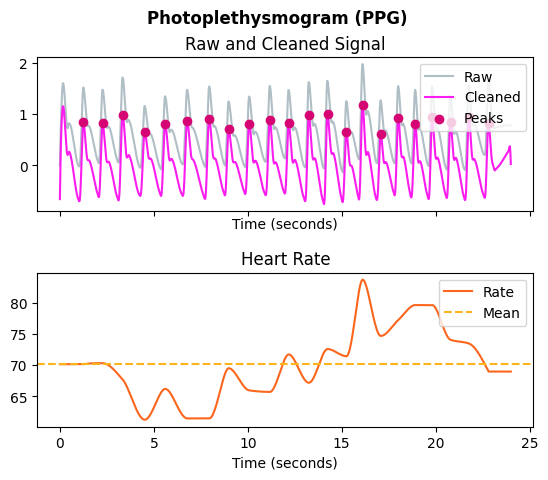

In [79]:
# Process it
signals, info = nk.ppg_process(ppg, sampling_rate=300)

# Visualize the processing
nk.ppg_plot(signals, sampling_rate=250)

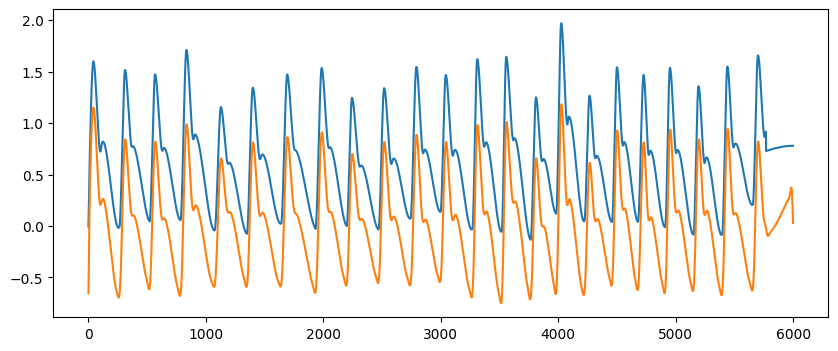

In [81]:
ppg_elgendi_clean = nk.ppg_clean(ppg, method='elgendi', sampling_rate=300)
ppg_nabian_clean = nk.ppg_clean(ppg, method='nabian2018')

signals_filtered = pd.DataFrame({'PPG_Raw' : ppg,
                        'PPG_Elgendi' : ppg_elgendi_clean,})
plt.figure(figsize=(10,4))
plt.plot(signals_filtered)


[0, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000]
   Label  PPG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  \
1      1      99.058035  184.712500  62.345342         NaN         NaN   
2      2      95.316011  192.363636  64.160963         NaN         NaN   
3      3      91.439622  201.081081  90.875914         NaN         NaN   
4      4      91.844634  201.513514  89.874226         NaN         NaN   
5      5      94.345175  195.644737  89.911913         NaN         NaN   
6      6      97.354045  189.088608  82.915958         NaN         NaN   
7      7      80.215646  175.092308  46.057954         NaN         NaN   
8      8      64.271303  169.557692  41.515607         NaN         NaN   
9      9      43.453322  168.342857  41.453690         NaN         NaN   
10    10      21.325073  171.823529  41.438562         NaN         NaN   

    HRV_SDANN2  HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5  ...  HRV_SampEn  \
1          NaN         NaN         NaN         NaN

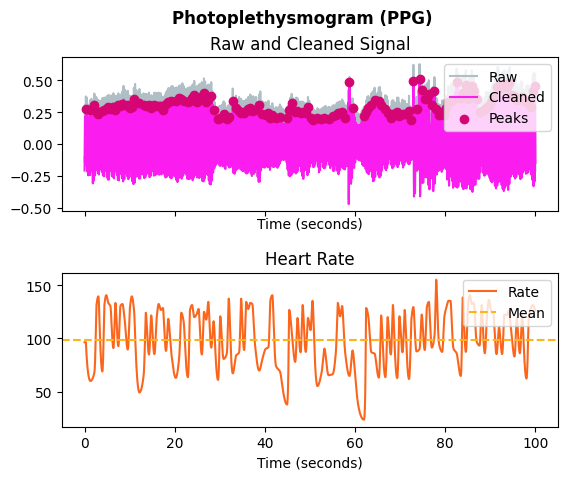

In [131]:
data = nk.data("bio_resting_5min_100hz")

event_time = []
for i in range(10):
    event_time.append(int((i/10)*len(data)))
print(event_time)

data_samp = data["PPG"]
df, info = nk.ppg_process(data["PPG"], sampling_rate=300)

# Visualize the processing
nk.ppg_plot(df, sampling_rate=300)

epochs = nk.epochs_create(df, events=event_time, sampling_rate=100,
                          epochs_end=150)


features = nk.ppg_intervalrelated(epochs)
features_event = nk.ppg_eventrelated(epochs)
features.dropna(axis='columns')
features_event.dropna(axis='columns')
print(features)
print(features_event)

# BVP data

In [148]:
print(baseline.shape)

(800800,)


In [152]:
print(wrist_data_dict['BVP'][0])

[-59.37]


In [142]:
# Dataset reading
class read_data_of_one_subject:
            """Read data from WESAD dataset"""
            def __init__(self, path, subject):
                self.keys = ['label', 'subject', 'signal']
                self.signal_keys = ['wrist', 'chest']
                self.chest_sensor_keys = ['ACC', 'ECG', 'EDA', 'EMG', 'Resp', 'Temp']
                self.wrist_sensor_keys = ['ACC', 'BVP', 'EDA', 'TEMP']
                #os.chdir(path)
                #os.chdir(subject)
                with open(path + subject +'/'+subject + '.pkl', 'rb') as file:
                    data = pickle.load(file, encoding='latin1')
                self.data = data

            def get_labels(self):
                return self.data[self.keys[0]]

            def get_wrist_data(self):
                """"""
                #label = self.data[self.keys[0]]
                #assert subject == self.data[self.keys[1]]
                signal = self.data[self.keys[2]]
                wrist_data = signal[self.signal_keys[0]]
                #wrist_ACC = wrist_data[self.wrist_sensor_keys[0]]
                #wrist_ECG = wrist_data[self.wrist_sensor_keys[1]]
                return wrist_data

            def get_chest_data(self):
                """"""
                signal = self.data[self.keys[2]]
                chest_data = signal[self.signal_keys[1]]
                return chest_data
# Set up empty dataframes for the features


fs = 700 # sampling frequency
y = []
data_set_path= "C:/Users/JackC/Documents/EPO4/WESAD/WESAD/" # Folder path
#data_set_path= "C:/Users/riche/Downloads/WESAD/WESAD/" # Folder path
#data_set_path = "C:/Users/Adnane/Downloads/WESAD/WESAD/"

for i in range(16): # 15 subjects
    subject = 'S'+str(i+2) # Cycle through S2 to S17
    print(subject)
    if subject != 'S12': # Skip S12, because it does not exist
        # Object instantiation
        obj_data = {}

        # Accessing class attributes and method through objects
        obj_data[subject] = read_data_of_one_subject(data_set_path, subject)

        wrist_data_dict = obj_data[subject].get_wrist_data()
        wrist_dict_length = {key: len(value) for key, value in wrist_data_dict.items()}

        # Get labels
        labels = obj_data[subject].get_labels()

        for label in range(1,5): # for every state of stress
            
            baseline = np.asarray([idx for idx,val in enumerate(labels) if val == label])

            bvp_base=wrist_data_dict['BVP'][baseline,0] # Select the BVP data

            duration = 25

            # Multiple smaller samples per signal
            samples = 10 # specify amount of samples
            
            for j in range(samples):

                # adding the labels to y
                if label==3 or label==4: # if amusement or medidation, classify as non-stress
                    y.append(1)
                else:
                    y.append(label)

                #bvp = bvp_base[int(len(bvp_base)* (j/samples)) : int(len(bvp_base)* ((j+1)/samples))]
                # choosing a random begin point for smaller sample
                begin = random.randint(0, min(len(bvp_base),len(bvp_base))- duration * fs)

                bvp = bvp_base[begin: begin + duration*fs]

S2


IndexError: index 389056 is out of bounds for axis 0 with size 389056